In [1]:
from dynamic_topic_modeling.sklearn_lda import *
from dynamic_topic_modeling.dtm import *
import pandas as pd

In [2]:
df = pd.read_csv("../imp_rmd/天龙八部.csv")
df = df.dropna(subset=['text'])

In [3]:
df['text'].head()

0    天龙八部这名词出于佛经许多大乘佛经叙述佛向诸菩萨比丘等说法时崐常有天龙八部参与听法如法华经提...
1               非人包括八种神道怪物因为以天及龙为首崐所以称为天龙八部八部罗归那罗八摩听罗迦
2    天是指天神在佛教天神的地位并非至高无上只不过比人能享受到崐到更大更长久的福报而已佛教认为一切...
3    龙是指神佛经的龙和我国的传说的龙大致差不多不过没有脚崐有的大蟒蛇也称事实上人对龙和龙王的观念...
4    乾达婆是一种不吃酒内只寻香气作为滋养的神是服侍帝释的乐神之一崐身上发出浓冽的香气乾达婆在梵语...
Name: text, dtype: object

In [4]:
series_slices = df['bin'] \
    .value_counts() \
    .reindex(df['bin'].unique().tolist()) \
    .tolist()

In [5]:
series_slices[0:5]

[974, 1505, 223, 189, 667]

In [6]:
docs = build_docs(df['text'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIJIAX~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.242 seconds.
Prefix dict has been built succesfully.


In [7]:
dictionary = build_dict(docs, no_below=2, no_above=0.1)
# 但是一个样本字数不够，也会报错

D:\install\miniconda\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
D:\install\miniconda\lib\site-packages\gensim\models\doc2vec.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import namedtuple, defaultdict, Iterable


In [8]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [9]:
for idx, i in enumerate(corpus):
    if i == []:
        print(idx)

In [10]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 25114
Number of documents: 9125


In [35]:
dictionary.save_as_text('output/demo_dict_text.txt')

`save_as_text()` 参考 https://radimrehurek.com/gensim/corpora/dictionary.html

In [12]:
from gensim.models.wrappers import DtmModel
from gensim.utils import dict_from_corpus

# Set training parameters.
num_topics = 2
chunksize = 2000
passes = 20
iterations = 1
eval_every = None

# id2word = dictionary.id2token
# 这是空
id2word = dict_from_corpus(corpus)
model = DtmModel('refs/dtm-win64.exe', corpus=corpus, id2word=id2word, num_topics = num_topics,
                 time_slices=series_slices, model='fixed')

In [13]:
from dynamic_topic_modeling.dtm import display_topic

In [14]:
model_df = display_topic(timespans=len(series_slices), num_topics=num_topics, model=model, num_words=10)

In [15]:
model_df.head()

,topicId,period,word,weight
0,0,0,20592,0.003035
1,0,0,5716,0.002684
2,0,0,16012,0.002371
3,0,0,1063,0.002169
4,0,0,1297,0.002147


In [30]:
topics = model.show_topic(topicid=1, time=1, topn=10)

In [16]:
model_df.to_csv("output/demo_model_df.csv", index = False)

![](figure/demo_word_evolution.png)

In [17]:
from dynamic_topic_modeling.dtm import topic_distribution

In [18]:
topic_df = topic_distribution(num_topics=num_topics, model=model, time_seq=series_slices)

In [19]:
topic_df.to_csv("output/demo_topic_df.csv", index=False)

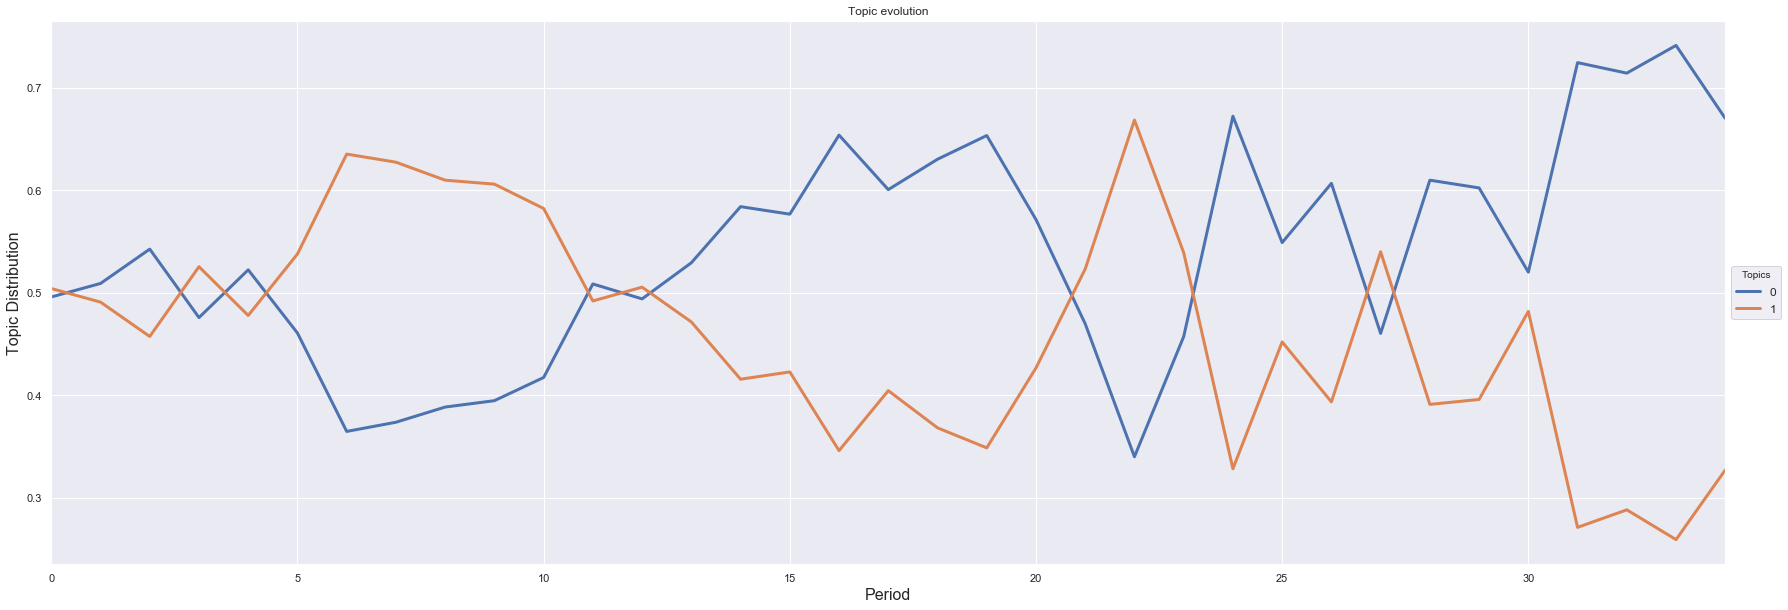

In [20]:
visualize_topics(topic_df)

![](figure/demo_topic_evolution.png)

小说按照章节来看就是一个序列，序列里面都是文本，这里可以采用动态主题模型分析一下，
这里用天龙八部快速跑了一下，这是主题的趋势。
这里为了跑得快，因此只列举了两个主题，其实可以发展更多进行观察。
这里的 Python 包开源了，

```bash
pip install dynamic_topic_modeling
```

或者去 GitHub 主页 https://github.com/JiaxiangBU/dynamic_topic_modeling

实现 demo 参考 https://nbviewer.jupyter.org/urls/jiaxiangbu.github.io/dynamic_topic_modeling/demo.ipynb